In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

In [3]:
pwd()

'C:\\Users\\Ayan Mukherjee'

In [33]:
df=pd.read_csv('original.csv')

In [34]:
df.head()

,gender,married,ch,income,loanamt,status
0,Male,No,1.0,5849,NaN,Y
1,Male,Yes,1.0,4583,128.0,N
2,Male,Yes,1.0,3000,66.0,Y
3,Male,Yes,1.0,2583,120.0,Y
4,Male,No,1.0,6000,141.0,Y


In [35]:
df.describe()

,ch,income,loanamt
count,564.000000,614.000000,592.000000
mean,0.842199,5403.459283,146.412162
std,0.364878,6109.041673,85.587325
min,0.000000,150.000000,9.000000
25%,1.000000,2877.500000,100.000000
50%,1.000000,3812.500000,128.000000
75%,1.000000,5795.000000,168.000000
max,1.000000,81000.000000,700.000000


In [36]:
df.columns

Index(['gender', 'married', 'ch', 'income', 'loanamt', 'status'], dtype='object')

In [37]:
df.shape

(614, 6)

In [38]:
df.isnull().sum()

gender     13
married     3
ch         50
income      0
loanamt    22
status      0
dtype: int64

In [39]:
#Drop null

df=df.dropna()

In [40]:
df.isnull().sum()

gender     0
married    0
ch         0
income     0
loanamt    0
status     0
dtype: int64

In [41]:
#Dummy variable creation
df=df.drop(['gender'],axis=1)

In [42]:
df1=pd.get_dummies(df,drop_first=True)

In [43]:
#Normalize data
from sklearn.preprocessing import StandardScaler
scalar_= StandardScaler()

In [44]:
df1['income']=scalar_.fit_transform(df1[['income']])
df1['loanamt']=scalar_.fit_transform(df1[['loanamt']])
df1.head()

,ch,income,loanamt,married_Yes,status_Y
1,1.0,-0.128073,-0.194250,1,0
2,1.0,-0.392077,-0.971015,1,1
3,1.0,-0.461621,-0.294478,1,1
4,1.0,0.108246,-0.031380,0,1
5,1.0,0.011017,1.547205,1,1


In [48]:
df1['status_Y'].value_counts()

1    365
0    164
Name: status_Y, dtype: int64

In [49]:
Y=df1['status_Y']
X=df1.drop(['status_Y'],axis=1)

In [55]:
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test=train_test_split(X,Y, test_size=0.25,random_state=123,stratify=Y)

In [59]:
Y_test.shape

(133,)

In [57]:
Y_test.value_counts()

1    92
0    41
Name: status_Y, dtype: int64

In [60]:
from sklearn.linear_model import LogisticRegression
lr=LogisticRegression()

In [61]:
lr.fit(X_train,Y_train)

C:\Users\Ayan Mukherjee\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='warn', tol=0.0001, verbose=0,
                   warm_start=False)

In [62]:
Y_pred=lr.predict(X_test)

In [66]:
#Confusion Matrix
from sklearn.metrics import confusion_matrix
cm=confusion_matrix(Y_test,Y_pred)

In [67]:
cm

array([[15, 26],
       [ 1, 91]], dtype=int64)

In [68]:
Y_pred_1=lr.predict(X_train)

In [69]:
cm_1=confusion_matrix(Y_train,Y_pred_1)

In [70]:
cm_1

array([[ 60,  63],
       [  6, 267]], dtype=int64)

In [71]:
Y_train.value_counts()

1    273
0    123
Name: status_Y, dtype: int64

In [72]:
acc_train=lr.score(X_train,Y_train)

In [73]:
acc_train

0.8257575757575758

In [74]:
acc_test=lr.score(X_test,Y_test)

In [75]:
acc_test

0.7969924812030075

In [79]:
(cm[0][0]+cm[1][1])/cm.sum()

0.7969924812030075

In [80]:
(cm_1[0][0]+cm_1[1][1])/cm_1.sum()

0.8257575757575758

In [155]:
#Jose Portilla's
#All libraries imported
df_train=pd.read_csv('titanic_train.csv')

In [82]:
df_train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [83]:
df_train.shape

(891, 12)

In [84]:
df_train.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [86]:
#Check for missing values
df_train.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

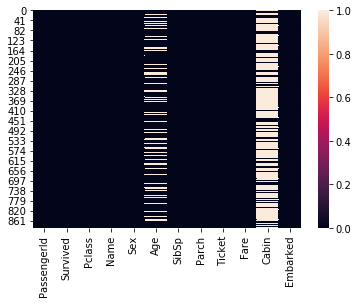

In [87]:
sns.heatmap(df_train.isnull())

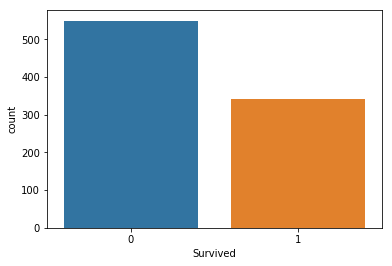

In [88]:
sns.countplot(x='Survived',data=df_train)

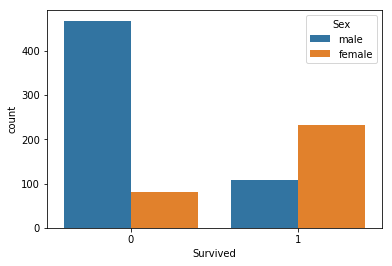

In [89]:
sns.countplot(x='Survived',data=df_train,hue='Sex')

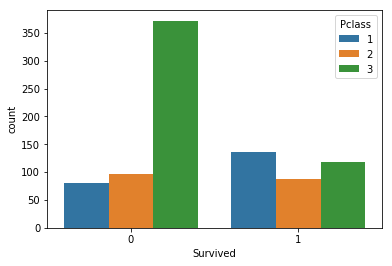

In [90]:
sns.countplot(x='Survived',data=df_train,hue='Pclass')

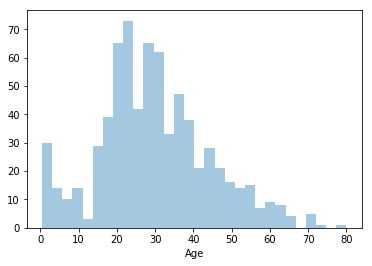

In [91]:
sns.distplot(df_train['Age'].dropna(),kde=False,bins=30)

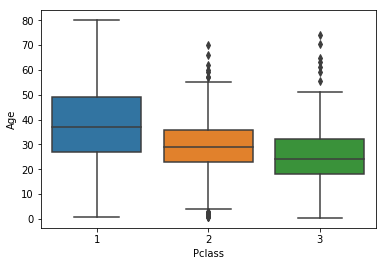

In [93]:
#Missing value imputation for Age
sns.boxplot(x='Pclass',y='Age',data=df_train)

In [95]:
def impute_age(cols):
    Age=cols[0]
    Pclass=cols[1]
    
    if pd.isnull(Age):
        if Pclass==1:
            return 37
        elif Pclass==2:
            return 29
        else:
            return 25
    else:
        return (Age)

In [156]:
df_train['Age']=df_train[['Age','Pclass']].apply(impute_age,axis=1)

In [157]:
df_train.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age              0
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [158]:
df_train.drop(['Cabin'],axis=1,inplace=True)

In [159]:
df_train.dropna(inplace=True)

In [160]:
df_train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S


In [161]:
Sex_1=pd.get_dummies(df_train['Sex'],drop_first=True)

In [162]:
Embarked_1=pd.get_dummies(df_train['Embarked'],drop_first=True)

In [163]:
df_train.drop(['Sex','Embarked','Name','Ticket'],inplace=True, axis=1)

In [164]:
df_train.head()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
0,1,0,3,22.0,1,0,7.2500
1,2,1,1,38.0,1,0,71.2833
2,3,1,3,26.0,0,0,7.9250
3,4,1,1,35.0,1,0,53.1000
4,5,0,3,35.0,0,0,8.0500


In [165]:
df=pd.concat([df_train,Sex_1,Embarked_1],axis=1)

In [166]:
df.head()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare,male,Q,S
0,1,0,3,22.0,1,0,7.2500,1,0,1
1,2,1,1,38.0,1,0,71.2833,0,0,0
2,3,1,3,26.0,0,0,7.9250,0,0,1
3,4,1,1,35.0,1,0,53.1000,0,0,1
4,5,0,3,35.0,0,0,8.0500,1,0,1


In [170]:
df.drop(['PassengerId'],axis=1,inplace=True)

In [171]:
from sklearn.model_selection import train_test_split
X=df.drop(['Survived'],axis=1)
Y=df['Survived']

In [172]:
X.head()

,Pclass,Age,SibSp,Parch,Fare,male,Q,S
0,3,22.0,1,0,7.2500,1,0,1
1,1,38.0,1,0,71.2833,0,0,0
2,3,26.0,0,0,7.9250,0,0,1
3,1,35.0,1,0,53.1000,0,0,1
4,3,35.0,0,0,8.0500,1,0,1


In [173]:
X_train, X_test, Y_train, Y_test=train_test_split(X, Y, test_size=0.2, random_state=123, stratify=Y)

In [174]:
from sklearn.linear_model import LogisticRegression
lr=LogisticRegression()

In [175]:
lr.fit(X_train, Y_train)

C:\Users\Ayan Mukherjee\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='warn', tol=0.0001, verbose=0,
                   warm_start=False)

In [178]:
from sklearn.metrics import confusion_matrix

In [179]:
Y_pred=lr.predict(X_train)

In [180]:
conf_train=confusion_matrix(Y_train,Y_pred)

In [181]:
conf_train

array([[387,  52],
       [ 91, 181]], dtype=int64)

In [182]:
acc_train=(conf_train[0][0]+conf_train[1][1])/np.sum(conf_train)
acc_train

0.7988748241912799

In [183]:
Y_pred_test=lr.predict(X_test)

In [184]:
conf_test=confusion_matrix(Y_test,Y_pred_test)
conf_test

array([[97, 13],
       [18, 50]], dtype=int64)

In [185]:
acc_test=(conf_test[0][0]+conf_test[1][1])/np.sum(conf_test)
acc_test

0.8258426966292135

In [207]:
#Check---imp code
Y_pred1=np.where(lr.predict_proba(X_test)[:,1]>0.8,1,0)

In [208]:
conf1=confusion_matrix(Y_test,Y_pred1)
conf1

array([[109,   1],
       [ 51,  17]], dtype=int64)

In [209]:
from sklearn.metrics import classification_report

In [210]:
class_=classification_report(Y_pred1,Y_test)

In [211]:
print(class_)

              precision    recall  f1-score   support

           0       0.99      0.68      0.81       160
           1       0.25      0.94      0.40        18

    accuracy                           0.71       178
   macro avg       0.62      0.81      0.60       178
weighted avg       0.92      0.71      0.77       178



In [212]:
lr.predict_proba(X_test)

array([[0.91106596, 0.08893404],
       [0.51157534, 0.48842466],
       [0.84077903, 0.15922097],
       [0.07222211, 0.92777789],
       [0.35129382, 0.64870618],
       [0.84077903, 0.15922097],
       [0.88332443, 0.11667557],
       [0.87185946, 0.12814054],
       [0.88246859, 0.11753141],
       [0.41872897, 0.58127103],
       [0.34084941, 0.65915059],
       [0.87817673, 0.12182327],
       [0.59521865, 0.40478135],
       [0.83943771, 0.16056229],
       [0.58655686, 0.41344314],
       [0.05344547, 0.94655453],
       [0.93092307, 0.06907693],
       [0.41549005, 0.58450995],
       [0.86861095, 0.13138905],
       [0.88323157, 0.11676843],
       [0.75461574, 0.24538426],
       [0.4660295 , 0.5339705 ],
       [0.3965564 , 0.6034436 ],
       [0.79716741, 0.20283259],
       [0.08672678, 0.91327322],
       [0.90177538, 0.09822462],
       [0.20183964, 0.79816036],
       [0.94909314, 0.05090686],
       [0.1846787 , 0.8153213 ],
       [0.09442953, 0.90557047],
       [0.

In [213]:
pwd

'C:\\Users\\Ayan Mukherjee'